In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Downloading dataset form kaggle**

In [2]:
!kaggle datasets download -d l33tc0d3r/indian-food-classification

 99% 1.47G/1.48G [00:15<00:00, 150MB/s]
100% 1.48G/1.48G [00:15<00:00, 101MB/s]


**Extracting zip file**

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/indian-food-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [41]:
import tensorflow as tf
import numpy as np

**loading dataset**

In [5]:
image_size=(224,224)
Batch_size=32
train_ds=tf.keras.utils.image_dataset_from_directory(
    'Food Classification',
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size,
    validation_split=(0.2),
    subset='training',
    seed=123
)

image_size=(224,224)
Batch_size=32
validation_ds=tf.keras.utils.image_dataset_from_directory(
    'Food Classification',
    shuffle=True,
    image_size=image_size,
    batch_size=Batch_size,
    validation_split=(0.2),
    subset='validation',
    seed=123
)

Found 6269 files belonging to 20 classes.
Using 5016 files for training.
Found 6269 files belonging to 20 classes.
Using 1253 files for validation.


In [6]:
classes=train_ds.class_names

In [7]:
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [8]:
import matplotlib.pyplot  as plt

**Data Visualization**

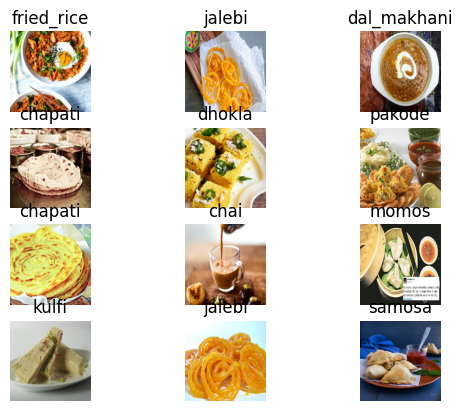

In [9]:
for images,labels in train_ds.take(1) :
  for i in range(12) :
    plt.subplot(4,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(classes[labels[i].numpy()])
    plt.axis(False)




**Scaling the data**

In [10]:
def preprocess(image, label) :
  image=tf.cast(image/255.,tf.float32)
  return image,label


In [11]:
train_ds=train_ds.map(preprocess)
validation_ds=validation_ds.map(preprocess)

In [12]:
for image,label in train_ds.take(1) :
  print(image[0].numpy())
  print(label[0].numpy())


[[[0.99607843 0.95686275 0.7551821 ]
  [0.99607843 0.95686275 0.7551821 ]
  [0.99559695 0.95638126 0.7547006 ]
  ...
  [0.99607843 0.9607843  0.65882355]
  [0.99607843 0.9607843  0.6511042 ]
  [0.99607843 0.9607843  0.6509804 ]]

 [[0.99607843 0.9529412  0.77254903]
  [0.99607843 0.9529412  0.77254903]
  [0.99607843 0.9529412  0.77254903]
  ...
  [0.99607843 0.9647059  0.64705884]
  [0.99607843 0.9607843  0.6509804 ]
  [0.99607843 0.9607843  0.6509804 ]]

 [[1.         0.95686275 0.7764706 ]
  [1.         0.95686275 0.7764706 ]
  [0.9995185  0.95638126 0.7759891 ]
  ...
  [0.99215686 0.9607843  0.63529414]
  [0.99607843 0.9610732  0.6506915 ]
  [0.99215686 0.95686275 0.64705884]]

 ...

 [[0.9608737  0.9412659  0.9255796 ]
  [0.9605161  0.94090825 0.925222  ]
  [0.9546314  0.93502355 0.9193373 ]
  ...
  [0.9762247  0.9566169  0.9409306 ]
  [0.97226876 0.9526609  0.93697464]
  [0.9764706  0.95686275 0.9411765 ]]

 [[0.96068805 0.9410802  0.92539394]
  [0.95341575 0.9338079  0.91812164]


In [13]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications import ResNet50

**Dowloading ResNet pretrained model with imagenet weights and removing full connected neural network**

In [14]:
base_model=ResNet50(weights='imagenet',
                 input_shape=(224,224,3),
                 include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [15]:
for i in base_model.layers:
  print(i.name)

input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3_

**Data Augmentation so that model does not over fit**

In [16]:
data_augmentation=Sequential(
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
              tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
)
data_augmentation.add(keras.layers.experimental.preprocessing.RandomZoom(0.2))
data_augmentation.add(keras.layers.experimental.preprocessing.RandomHeight(0.2))
data_augmentation.add(keras.layers.experimental.preprocessing.RandomWidth(0.2))

**Fine tuning the pretrained  Model**

**Dropout layer to prevent over fitting and
used L1 regularization to prevent over fitting**

In [17]:
model=Sequential()
data_augmentation,
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l1(0.001)))
model.add(keras.layers.Dropout(0.4))
model.add(Dense(20,activation="softmax"))

**Early stopping to prevent overfitting**

In [18]:
call_backs=tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],

  )

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 49283220 (188.00 MB)
Trainable params: 49230100 (187.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


**Training Model**

In [20]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds,callbacks=call_backs)

Epoch 1/100
157/157 [==============================] - 143s 627ms/step - loss: 100.3145 - accuracy: 0.2496 - val_loss: 99.1536 - val_accuracy: 0.0535
Epoch 2/100
157/157 [==============================] - 96s 597ms/step - loss: 94.7622 - accuracy: 0.6866 - val_loss: 95.4929 - val_accuracy: 0.0591
Epoch 3/100
157/157 [==============================] - 103s 634ms/step - loss: 89.8141 - accuracy: 0.8734 - val_loss: 90.1599 - val_accuracy: 0.1524
Epoch 4/100
157/157 [==============================] - 100s 621ms/step - loss: 84.7926 - accuracy: 0.9394 - val_loss: 84.4147 - val_accuracy: 0.3575
Epoch 5/100
157/157 [==============================] - 102s 623ms/step - loss: 79.5092 - accuracy: 0.9669 - val_loss: 78.3170 - val_accuracy: 0.5611
Epoch 6/100
157/157 [==============================] - 101s 621ms/step - loss: 73.9511 - accuracy: 0.9787 - val_loss: 72.1113 - val_accuracy: 0.7063
Epoch 7/100
157/157 [==============================] - 99s 616ms/step - loss: 68.1791 - accuracy: 0.9848 -

**Visuvalizing results**

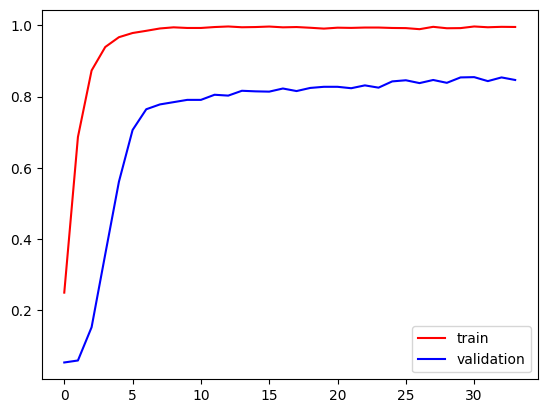

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**Saving the model**

In [32]:
score=model.evaluate(validation_ds)

40/40 [==============================] - 20s 385ms/step - loss: 1.4807 - accuracy: 0.8547


In [33]:
score

[1.4807335138320923, 0.8547486066818237]

In [68]:
y_pred=[]
y_true=[]

for images,labels in validation_ds :
  temp=[np.argmax(i) for i in model.predict(images)]
  y_pred.extend(temp)
  y_true.extend(labels.numpy())



1/1 [==============================] - 0s 137ms/step


In [69]:
print(len(y_pred),len(y_true))

1253 1253


**Model evaluation**

In [80]:
from sklearn.metrics import classification_report
clf=classification_report(y_true,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.75      0.81      0.78        64
           2       0.89      0.89      0.89        65
           3       0.81      0.70      0.75        71
           4       0.91      0.91      0.91        86
           5       0.87      0.90      0.89        73
           6       0.65      0.89      0.75        65
           7       0.85      0.93      0.89        71
           8       0.89      0.90      0.90        63
           9       0.97      0.93      0.95        60
          10       0.88      0.76      0.82        59
          11       0.92      0.86      0.89        96
          12       0.78      0.84      0.81        43
          13       0.89      0.85      0.87        59
          14       0.83      0.90      0.86        60
          15       0.88      0.67      0.76        21
          16       0.81      0.79      0.80        58
          17       0.88    

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_true,y_pred)


<Figure size 6000x6000 with 0 Axes>

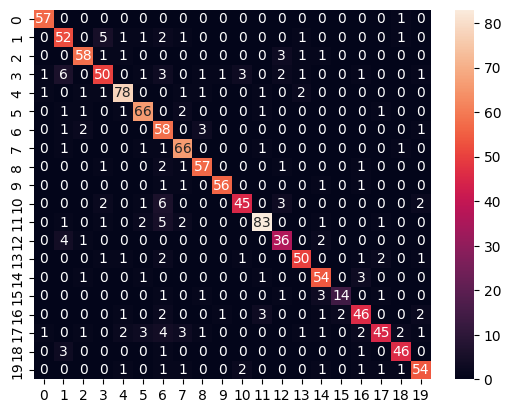

<Figure size 6000x6000 with 0 Axes>

In [79]:
sns.heatmap(cm,annot=True)
plt.figure(figsize=(60,60))

**Saving Model**

In [ ]:
model.save('model.keras')